1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

Text(0.5, 1.0, 'Not decay of the 1000 Tl atoms')

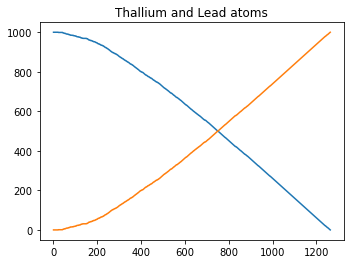

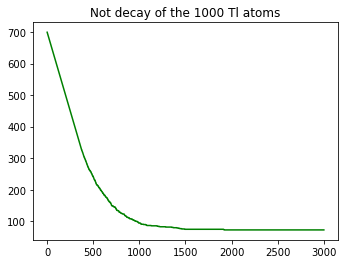

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from numpy import random

import matplotlib.pyplot as plt

def probability_f(t, tau):
    return 1-2**(-t/tau)

tau = 3.052*60
tl = 1000
pb = 0
t = 0
thallium = []
lead = []
time = []

while tl > 0:
    random_number = random.rand()
    if random_number < probability_f(t, tau):
        tl = tl-1
        pb += 1
    t += 1
    time.append(t)
    thallium.append(tl)
    lead.append(pb)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(time, thallium)
plt.plot(time, lead)  
plt.title('Thallium and Lead atoms')


def probability_f_pdf(t, tau):
    """PDF of probability_f."""
    return (2**(-t/tau))*(np.log(2)/tau)

tl2 = 700
t2 = 0
thallium2 = []
time2 = []

while tl2 > 0 and t2 < 3000:
    random_number = random.rand()
    if random_number < (probability_f_pdf(t2, tau)*1000):
        tl2 = tl2-1
    #print(random_number, (probability_f_pdf(t2, tau)*1000))
    t2 += 1
    time2.append(t2)
    thallium2.append(tl2)
        
plt.figure(figsize=(12,4))
plt.subplot(122)
plt.plot(time2, thallium2, 'g-')
  
plt.title('Not decay of the 1000 Tl atoms')

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral with the hit/miss method = 1.34486
Mean = 1.3468013333333333 
Standard Deviation = 0.003009433138664474 
Error of estimate= 0.0019413333333333505
Integral with the hit/miss method = 1.34486
Mean = 1.3468013333333333 
Standard Deviation = 0.003009433138664474 
Error of estimate= 0.0019413333333333505

Integral with the mean value method = 1.346985283235503 
Error of estimate= 0.00018394990216963336

Integral with the mean value method = 1.346985283235503 
Error of estimate= 0.00018394990216963336


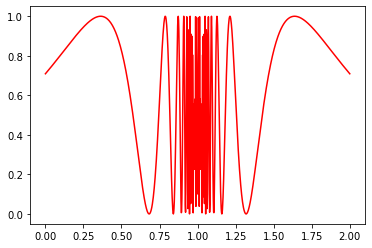

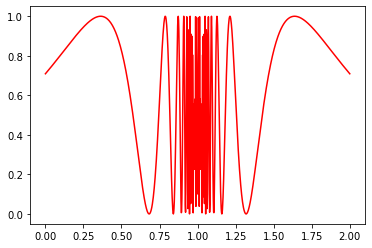

In [2]:
import statistics

def f(x):
    return (np.sin(1. / (1 - x)))**2

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')

values_for_std = []
for i in range(30):
    N = 100000
    count = 0
    for i in range(N):
        x = 2 * np.random.random() # x is random uniform between 0 and 2
        y = np.random.random()     # y is random uniform between 0 and 1
        if y < f(x): count += 1
    I1 = 2*count / N
    values_for_std.append(I1)
print("Integral with the hit/miss method =", I1)

mu = statistics.mean(values_for_std)
sigma = statistics.stdev(values_for_std)
print('Mean =', mu, '\nStandard Deviation =', sigma, '\nError of estimate=', abs(I1-mu))

Ν = 100000000
a = 0
b = 2
x = np.random.uniform(a,b,Ν)
I2 = np.mean(f(x)*(b-a))

print("\nIntegral with the mean value method =", I2, '\nError of estimate=', abs(I2-mu))

3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [5]:
def f(x,y):
    if ((x**2)+(y**2) < 1): return 1
    else: return 0

N = 100000 #iteration
count = 0

#1)
for i in range(N):
    x = np.random.random() # x is random uniform between 0 and 1
    y = np.random.random() # y is random uniform between 0 and 1
    if y <= f(x,y): count += 1
I1 = 4 * (count / N) # area of the first quadrant * 4
print("Integral of the circle:", I1)

#2)

dim = 10 
count_to_compute = 0

for i in range(N):
    point = np.random.uniform(-1.0, 1.0, dim)
    distance = np.linalg.norm(point)
    if distance <= 1.0:
        count_to_compute += 1

I2 = np.power(2.0, dim) * (count_to_compute / N)

print("Integral of the 10D sphere:", I2)


Integral of the circle: 3.14424
Integral of the circle: 3.14424
Integral of the 10D sphere: 2.49856
Integral of the 10D sphere: 2.49856


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [4]:
def f(x):
    return (x**(-1/2))/(np.exp(x)+1)

def w(x):
    return(1/np.sqrt(x))

n = 10000

x = np.random.random(n)**2
V = 2
I3 = 1 / n * np.sum(f(x)/w(x))*V
print("Integral with the importance sampling method is =", I3)

Integral with the importance sampling method is = 0.8388012531779696
Integral with the importance sampling method is = 0.8388012531779696
